<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier


### Load dataset

In [2]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')

In [3]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_df.isnull().sum().sum()

0

In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###Preprocessing


*   Use LabelEncoder to convert the label into numbers.
*   Convert the features to one-hot encoding using `df_dummies = pd.get_dummies(df)`
*  Column "duration" must be deleted


drop duration column

In [7]:
bank_preprocess = bank_df.drop(columns=['duration'])

handle ordinal categorical variables with label encoding

In [8]:
bank_preprocess[["y"]] = bank_preprocess[["y"]].apply(LabelEncoder().fit_transform)

In [9]:
#create df of norminal categorical variables 
df_obj = bank_preprocess.select_dtypes(include='object')

In [10]:
df_obj.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [11]:
for cols in df_obj:
    print(cols + ':   ' + df_obj[cols].unique())

['job:   housemaid' 'job:   services' 'job:   admin.' 'job:   blue-collar'
 'job:   technician' 'job:   retired' 'job:   management'
 'job:   unemployed' 'job:   self-employed' 'job:   unknown'
 'job:   entrepreneur' 'job:   student']
['marital:   married' 'marital:   single' 'marital:   divorced'
 'marital:   unknown']
['education:   basic.4y' 'education:   high.school'
 'education:   basic.6y' 'education:   basic.9y'
 'education:   professional.course' 'education:   unknown'
 'education:   university.degree' 'education:   illiterate']
['default:   no' 'default:   unknown' 'default:   yes']
['housing:   no' 'housing:   yes' 'housing:   unknown']
['loan:   no' 'loan:   yes' 'loan:   unknown']
['contact:   telephone' 'contact:   cellular']
['month:   may' 'month:   jun' 'month:   jul' 'month:   aug'
 'month:   oct' 'month:   nov' 'month:   dec' 'month:   mar'
 'month:   apr' 'month:   sep']
['day_of_week:   mon' 'day_of_week:   tue' 'day_of_week:   wed'
 'day_of_week:   thu' 'day_of_wee

handle norminal categorical variavles with onehot encoding

In [12]:
df_obj = pd.get_dummies(df_obj, prefix=["job", "marital", "education", "contact", "month", "day_of_week","poutcome", "default", "housing",	"loan"], drop_first=True)

In [13]:
df_obj.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_unknown,contact_yes,month_unknown,month_yes,day_of_week_unknown,day_of_week_yes,poutcome_telephone,default_aug,default_dec,default_jul,default_jun,default_mar,default_may,default_nov,default_oct,default_sep,housing_mon,housing_thu,housing_tue,housing_wed,loan_nonexistent,loan_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [14]:
bank_preprocess.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
#drop categorcial variables from df
bank_preprocess = bank_preprocess.select_dtypes(exclude=['object'])

In [16]:
bank_preprocess.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
#combine bank_preprocess and df_obj dataframe together
bank_combine = pd.concat([bank_preprocess, df_obj], axis=1)

In [18]:
bank_combine.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_unknown,contact_yes,month_unknown,month_yes,day_of_week_unknown,day_of_week_yes,poutcome_telephone,default_aug,default_dec,default_jul,default_jun,default_mar,default_may,default_nov,default_oct,default_sep,housing_mon,housing_thu,housing_tue,housing_wed,loan_nonexistent,loan_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [19]:
bank_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

Plot histogram of the label and calculate the imbalance in the dataset.

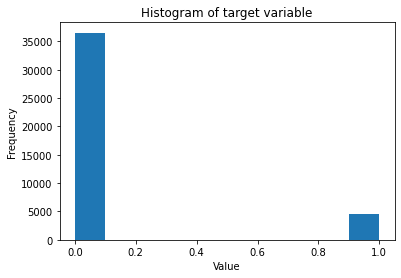

In [38]:
plt.hist(bank_combine.y)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of target variable')
plt.show()


In [21]:
bank_combine['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

The dataset is largely imbalanced with 36,548 no(0) values and 4,640 yes(1) values.

calculate the imbalance in the dataset.

### Modelling

**Question 6:** 
*   Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.
* Perform 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
*   Report the average F1 score with two numbers after the floating point (e.g., 0.56)

In [107]:
#seperating the feature and target set again 
y = bank_combine['y']#target
X = bank_combine.drop(['y'], axis=1) #feature

In [108]:
#Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)

In [24]:
from collections import Counter

In [25]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 29238, 1: 3712})
Counter({0: 7310, 1: 928})


In [26]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [27]:
#creating a dummy classifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')
print("F1: %.2f +/- %.2f" % (dummy_scores.mean(), dummy_scores.std()))

F1: 0.11 +/- 0.02


In [51]:
#using random forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state = 60)

#fit classifier
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [52]:
#make prediction
rf_clf_pred = rf_clf.predict(X_test)

In [53]:
#evaluating performance using 10 fold cross validation
rf_clf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='f1')

In [54]:
print("F1: %.2f +/- %.2f" % (rf_clf_cv_score.mean(), rf_clf_cv_score.std()))


F1: 0.26 +/- 0.04


In [ ]:
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


Compare the results of your classifier with that of a dummy classifier.

The dummy classifier has an F1 score of 0.11 while the Random forest classifier has an F1 score of 0.26. This shows that there is higher precision and recall in the Random forest classifier than in the dummy classifier. 

**Question 7:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Perform 10-fold cross-validation using as a classifier a random forest with 150 estimators and a maximum depth of 6. Report the average F1 score with two numbers after the floating point (e.g., 0.56)

In [98]:
#using random forest model
model_rf_new = RandomForestClassifier(n_estimators=400, random_state=60, max_depth=6)

#fit classifier
model_rf_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [99]:
#make prediction
model_rf_new_pred = model_rf_new.predict(X_test)

In [100]:
#evaluating performance using 10 fold cross validation
rf_cv_score_new = cross_val_score(model_rf_new, X_train, y_train, cv=10, scoring='f1')

In [101]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_new.mean(), rf_cv_score_new.std()))

F1: 0.29 +/- 0.05


**Question 9:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Train a random forest classifier with 400 estimators and a maximum depth of 6, setting the random_state parameter to 60.

What are the top 3 features?

In [88]:
#using random forest model
model_rf_new_new = RandomForestClassifier(n_estimators=100, max_depth=12, random_state = 60, oob_score = True)

#fit classifier
model_rf_new_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=60, verbose=0,
                       warm_start=False)

In [89]:
#make prediction
model_rf_new_new_pred = model_rf_new_new.predict(X_test)

In [90]:
#evaluating performance using 10 fold cross validation
rf_cv_score_new_new = cross_val_score(model_rf_new_new, X_train, y_train, cv=10, scoring='f1')

In [91]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_new_new.mean(), rf_cv_score_new_new.std()))

F1: 0.35 +/- 0.04


In [92]:
feature_importances = pd.DataFrame(model_rf_new_new.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [93]:
print(feature_importances)

                               importance
euribor3m                        0.169287
nr.employed                      0.131723
pdays                            0.085071
loan_success                     0.074030
age                              0.067039
emp.var.rate                     0.056718
cons.conf.idx                    0.056665
cons.price.idx                   0.039931
campaign                         0.029774
previous                         0.019215
poutcome_telephone               0.017881
default_oct                      0.015264
loan_nonexistent                 0.012821
default_may                      0.012656
month_yes                        0.012311
default_mar                      0.011951
housing_mon                      0.011169
education_university.degree      0.010463
housing_thu                      0.009204
marital_married                  0.009191
day_of_week_yes                  0.009128
marital_single                   0.008741
housing_tue                      0

**Question 8:**Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Report the generalisation error of a random forest classifier with 100 estimators and a maximum depth of 12. Report the F1 score with two numbers after the floating point (e.g., 0.56).

In [109]:
#using random forest model
model_rf_ge= RandomForestClassifier(n_estimators=100, max_depth=8, random_state = 60, oob_score = True)

#fit classifier
model_rf_ge.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=60, verbose=0,
                       warm_start=False)

In [110]:
#make prediction
model_rf_ge_pred = model_rf_ge.predict(X_test)

In [111]:
#evaluating performance using 10 fold cross validation
rf_cv_score_ge = cross_val_score(model_rf_ge, X_train, y_train, cv=10, scoring='f1')

In [112]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_ge.mean(), rf_cv_score_ge.std()))

F1: 0.31 +/- 0.04


In [113]:
#generalization error
print(model_rf_ge.oob_score_)

0.8993930197268589


Use GridSearchCV to find a better set of parameters for your random forest.
Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV
What are the top 3 features?
Report the generalisation error (still using the same metric) on your test set.

In [63]:
forestVC = RandomForestClassifier(random_state = 60,
                                  n_estimators = 400,
                                  max_depth = 6, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
modelVC = forestVC.fit(X_train, y_train) 
y_predVC = modelVC.predict(X_test)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
n_estimators = [100, 300, 400]
max_depth = [3, 6, 12]
min_samples_split = [ 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forestVC, hyperF, cv = 10, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 45.3min finished


In [66]:
model_rf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60,oob_score = True )
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=60, verbose=0,
                       warm_start=False)

In [67]:
#make prediction
y_predicts = model_rf.predict(X_test)

In [68]:
#evaluating performance using 10 fold cross validation
rf_cv_score_1 = cross_val_score(model_rf, X_train, y_train, cv=10, scoring='f1')

In [69]:
print("F1: %.2f +/- %.2f" % (rf_cv_score_1.mean(), rf_cv_score_1.std()))

F1: 0.30 +/- 0.04


In [70]:
print(model_rf_new_new.oob_score_)

0.8993626707132019


Another method for getting feature importance. 

In [80]:
m = RandomForestClassifier(n_estimators=400, max_depth = 6, random_state=60,oob_score=True)

m.fit(X_train, y_train)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':X_train.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, X_train); fi[:10]


,cols,imp
8,nr.employed,0.198712
7,euribor3m,0.182974
51,loan_success,0.115093
2,pdays,0.113018
4,emp.var.rate,0.087575
6,cons.conf.idx,0.068394
5,cons.price.idx,0.063201
0,age,0.020643
41,default_mar,0.018278
3,previous,0.017986
